In [612]:
import pandas as pd
import numpy as np
import os
import os.path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

# Loading original data set 

FILE_PATH = os.path.abspath(os.path.dirname('data/cities_after_eda.csv'))
location_df = pd.read_csv(FILE_PATH + '/cities_after_eda.csv')

# Reorder columns
location_df = location_df[['City','State','Date time','Conditions' ,'Latitude','Longitude','Temperature (degF)',
                           'Minimum Temperature (degF)','Maximum Temperature (degF)','Relative Humidity (%)',
                           'Cloud Cover (%)','Precipitation (in)','Precipitation Cover (%)', 'Wind Direction', 
                           'Wind Speed (mph)','Snow Depth (in)', 'Snow (in)','Dew Point (degF)','Visibility (mi)']]
location_df.head(3)

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3


In [613]:
# # Convert strings to Date time
location_df['Date time'] = pd.to_datetime(location_df['Date time'], errors = 'coerce')

In [614]:
location_df.dtypes

City                                  object
State                                 object
Date time                     datetime64[ns]
Conditions                            object
Latitude                             float64
Longitude                            float64
Temperature (degF)                   float64
Minimum Temperature (degF)           float64
Maximum Temperature (degF)           float64
Relative Humidity (%)                float64
Cloud Cover (%)                      float64
Precipitation (in)                   float64
Precipitation Cover (%)              float64
Wind Direction                       float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Snow (in)                            float64
Dew Point (degF)                     float64
Visibility (mi)                      float64
dtype: object

In [615]:
# Check if we have null values and how many per column
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    1
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [616]:
# Replace null value in Conditions column with the most common value
location_df['Conditions']= location_df[['Conditions']].apply(lambda x: x.fillna(x.value_counts().index[0]))
location_df['Conditions'].isnull().sum()

0

In [617]:
# Now Conditions feature has no Null values
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    0
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [618]:
# Null value percentage
round(100*(location_df.isnull().sum()/len(location_df.index)), 2)

City                          0.0
State                         0.0
Date time                     0.0
Conditions                    0.0
Latitude                      0.0
Longitude                     0.0
Temperature (degF)            0.0
Minimum Temperature (degF)    0.0
Maximum Temperature (degF)    0.0
Relative Humidity (%)         0.0
Cloud Cover (%)               0.0
Precipitation (in)            0.0
Precipitation Cover (%)       0.0
Wind Direction                0.0
Wind Speed (mph)              0.0
Snow Depth (in)               0.0
Snow (in)                     0.0
Dew Point (degF)              0.0
Visibility (mi)               0.0
dtype: float64

In [619]:
# Print the columns that have missing values and make a list 
na_list = location_df.columns[location_df.isnull().any()].to_list()
na_list

['Temperature (degF)',
 'Minimum Temperature (degF)',
 'Maximum Temperature (degF)',
 'Relative Humidity (%)',
 'Cloud Cover (%)',
 'Precipitation Cover (%)',
 'Wind Direction',
 'Wind Speed (mph)',
 'Snow Depth (in)',
 'Snow (in)',
 'Dew Point (degF)',
 'Visibility (mi)']

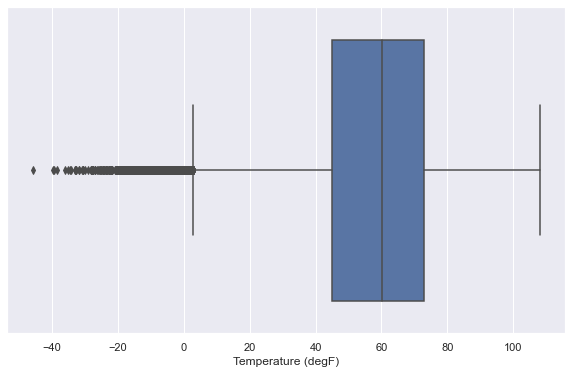

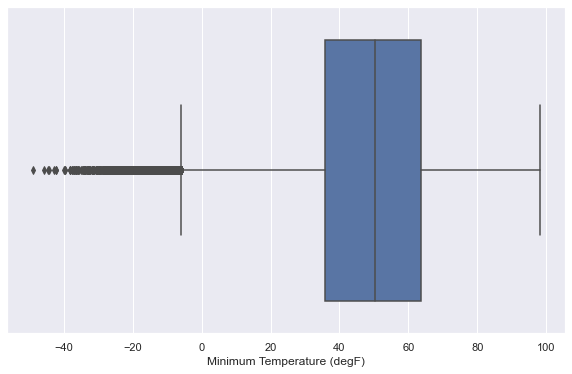

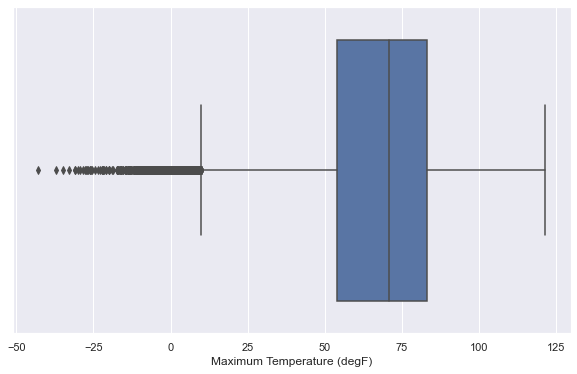

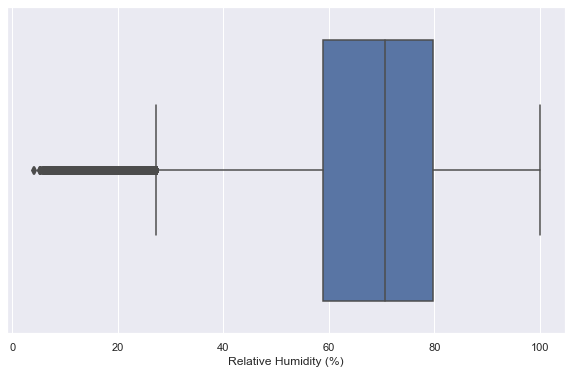

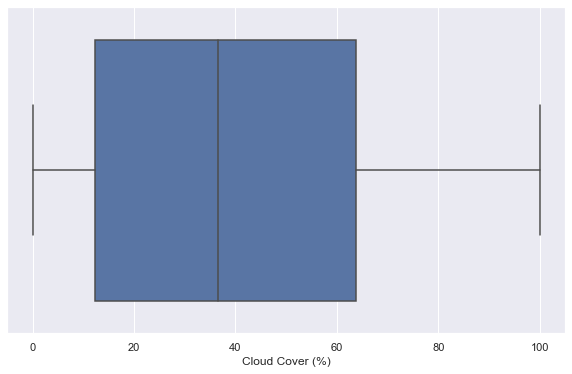

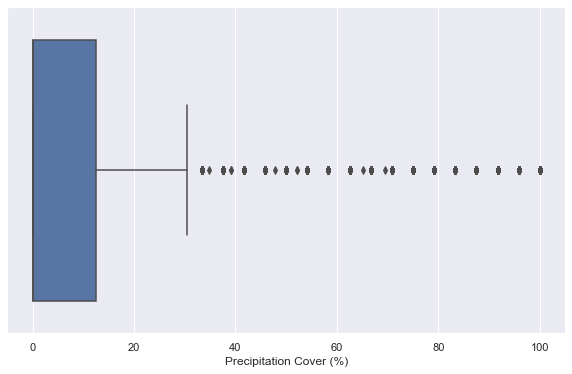

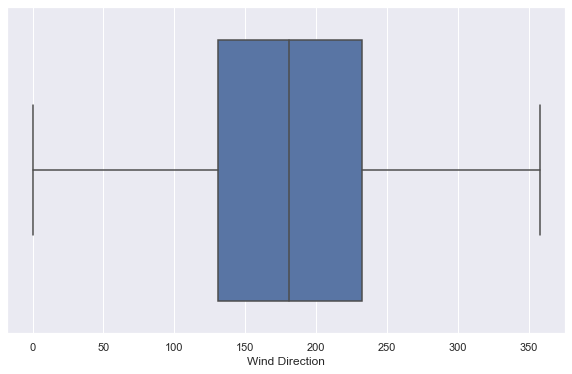

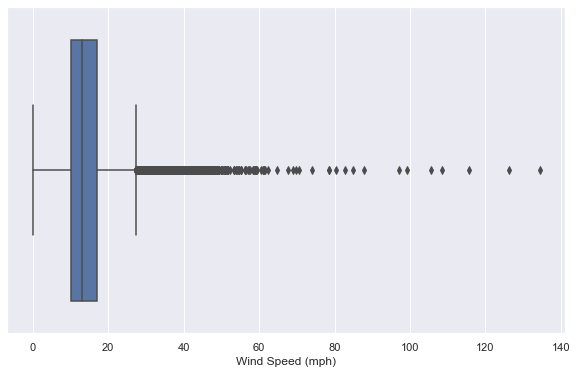

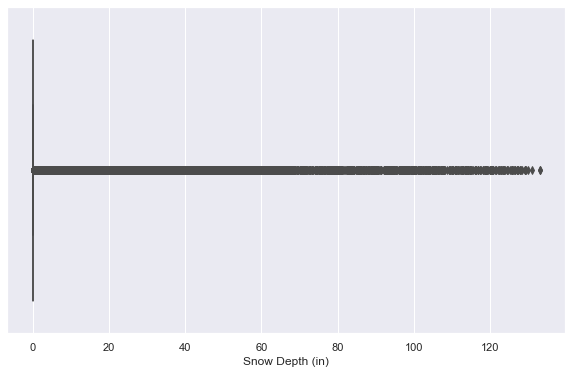

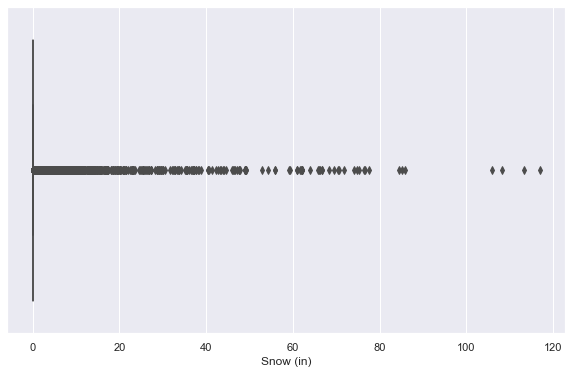

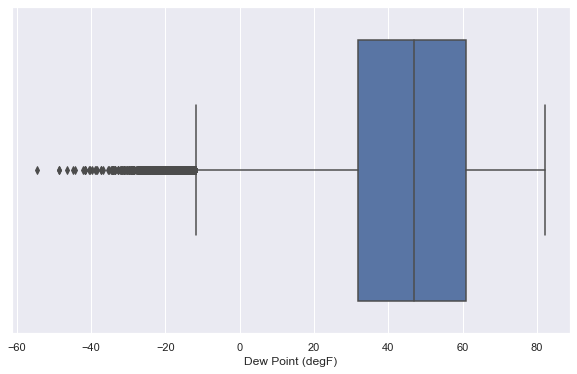

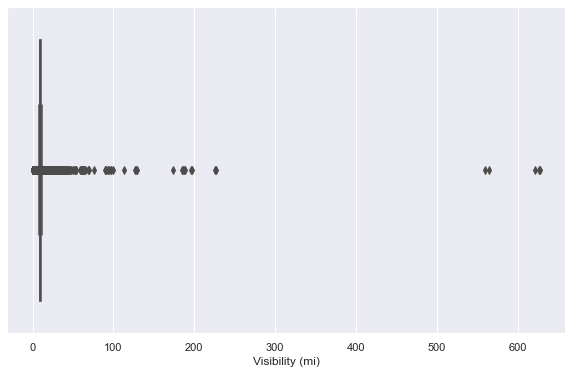

In [620]:
# Create boxplots of columns that have missing values to see if they have outliers
for column_x in na_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.boxplot(x = location_df[column_x])

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

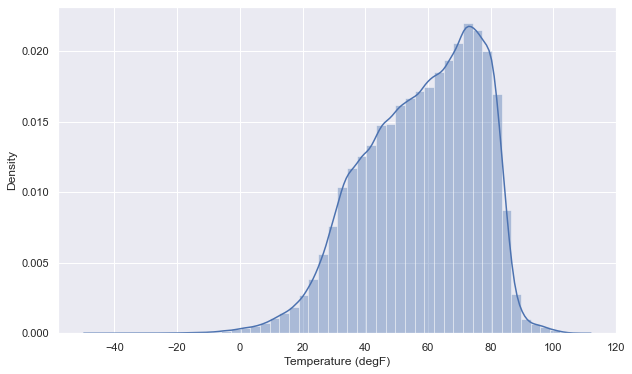

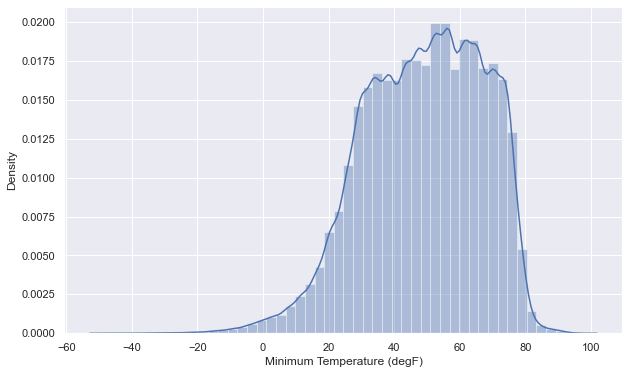

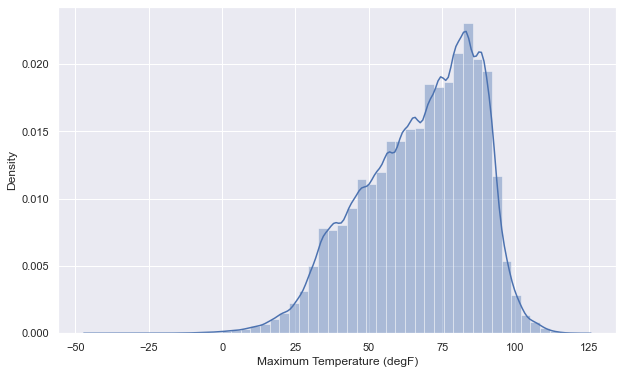

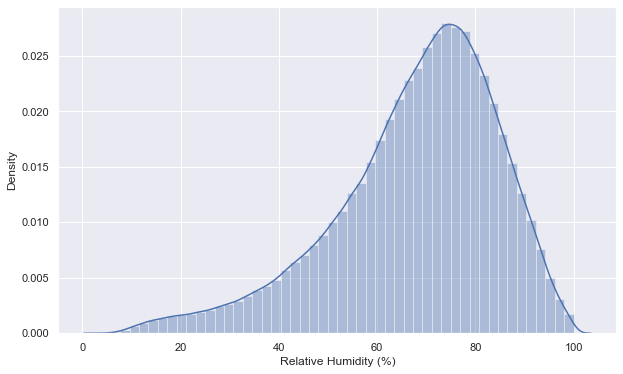

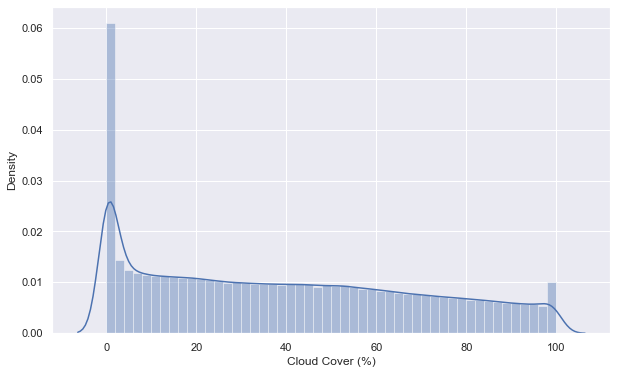

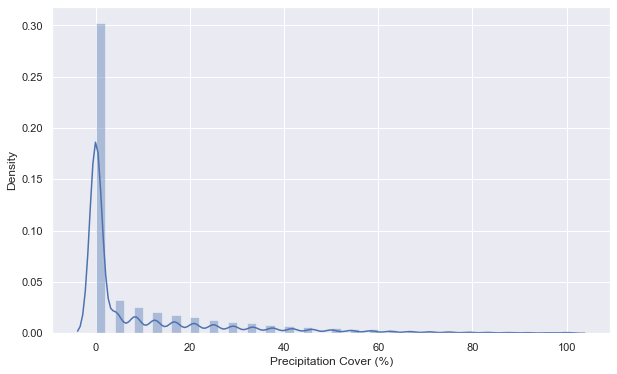

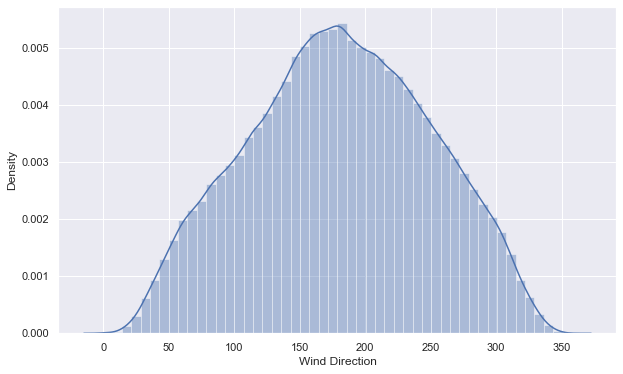

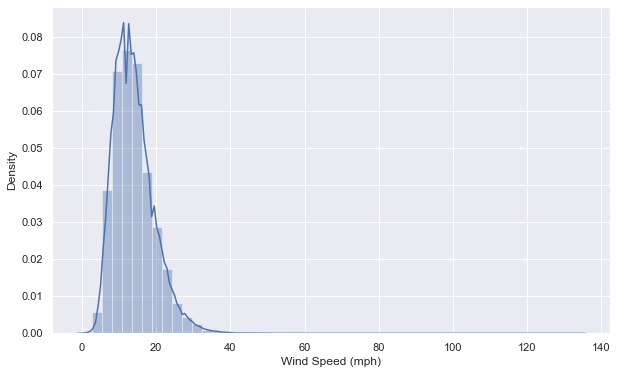

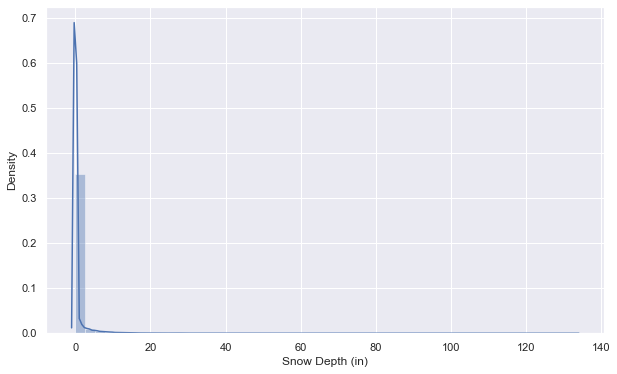

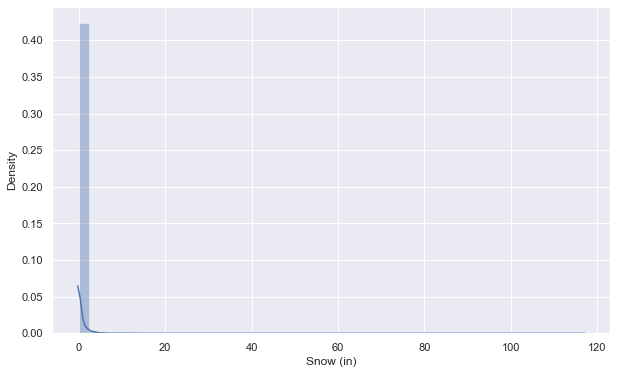

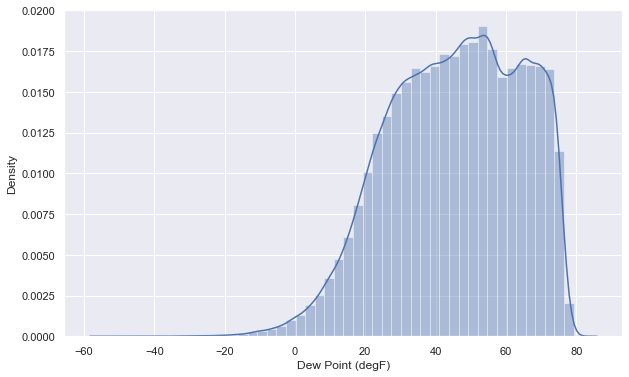

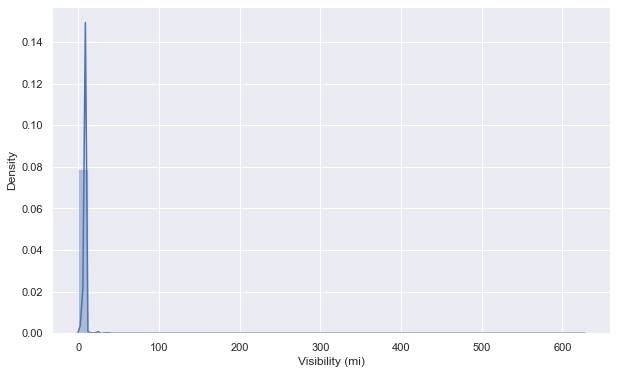

In [621]:
#Check for outliers using distribution plot for columns that have missing values
for column_x in na_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.distplot(location_df[column_x])

In [622]:
# Fill float type missing values with median values because most of the columns have outliers

float_columns = location_df.select_dtypes(include=['float64']).columns.tolist()

for column in location_df:
    if location_df[column].isnull().any():
        if(column in float_columns):
            location_df[column]=location_df[column].fillna(location_df[column].median())

In [623]:
# Check null values again after replacing them with modes
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    0
Latitude                      0
Longitude                     0
Temperature (degF)            0
Minimum Temperature (degF)    0
Maximum Temperature (degF)    0
Relative Humidity (%)         0
Cloud Cover (%)               0
Precipitation (in)            0
Precipitation Cover (%)       0
Wind Direction                0
Wind Speed (mph)              0
Snow Depth (in)               0
Snow (in)                     0
Dew Point (degF)              0
Visibility (mi)               0
dtype: int64

In [624]:
location_df.dtypes

City                                  object
State                                 object
Date time                     datetime64[ns]
Conditions                            object
Latitude                             float64
Longitude                            float64
Temperature (degF)                   float64
Minimum Temperature (degF)           float64
Maximum Temperature (degF)           float64
Relative Humidity (%)                float64
Cloud Cover (%)                      float64
Precipitation (in)                   float64
Precipitation Cover (%)              float64
Wind Direction                       float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Snow (in)                            float64
Dew Point (degF)                     float64
Visibility (mi)                      float64
dtype: object

In [625]:
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [626]:
# Describe numerical features
location_df.describe(exclude=['O'])

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Date time,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
count,560698,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000
unique,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.621192,-94.247102,58.067728,49.024800,67.662822,67.885244,39.700010,0.109232,10.104663,180.886972,13.925332,0.717415,0.084770,45.617073,9.295279
std,NaN,5.850423,16.927785,18.267214,18.072299,19.644054,16.716738,30.053036,0.352922,18.278802,69.135243,5.444722,4.659299,0.906782,18.571800,2.851304
min,NaN,21.304900,-157.858000,-45.900000,-49.000000,-43.000000,3.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-54.400000,0.000000
25%,NaN,33.693700,-108.564450,44.900000,35.800000,53.900000,58.800000,12.400000,0.000000,0.000000,130.750000,10.100000,0.000000,0.000000,31.800000,9.000000


In [627]:
# Describe catgorical features
location_df.describe(exclude='number')

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,City,State,Date time,Conditions
count,560698,560698,560698,560698
unique,348,49,1537,9
top,Springfield,CA,2020-02-04 00:00:00,Clear
freq,6144,61443,365,190806
first,NaN,NaN,2017-01-01 00:00:00,NaN
last,NaN,NaN,2021-03-17 00:00:00,NaN


In [628]:
location_df['Conditions'].value_counts()

Clear                     190806
Partially cloudy          136720
Rain, Partially cloudy     99373
Rain, Overcast             53281
Overcast                   23499
Rain                       21816
Snow, Partially cloudy     15829
Snow, Overcast             15013
Snow                        4361
Name: Conditions, dtype: int64

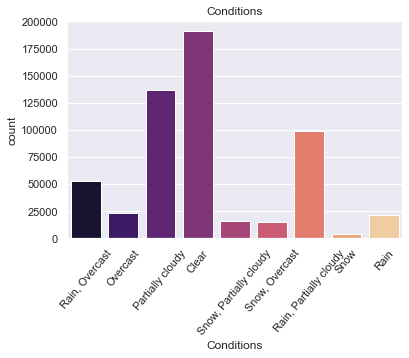

In [629]:
conditions = sns.countplot(x = 'Conditions', data = location_df, palette = 'magma')
conditions.set_xticklabels(conditions.get_xticklabels(), rotation=50)
plt.title('Conditions')
plt.show()

In [630]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560698 entries, 0 to 560697
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   City                        560698 non-null  object        
 1   State                       560698 non-null  object        
 2   Date time                   560698 non-null  datetime64[ns]
 3   Conditions                  560698 non-null  object        
 4   Latitude                    560698 non-null  float64       
 5   Longitude                   560698 non-null  float64       
 6   Temperature (degF)          560698 non-null  float64       
 7   Minimum Temperature (degF)  560698 non-null  float64       
 8   Maximum Temperature (degF)  560698 non-null  float64       
 9   Relative Humidity (%)       560698 non-null  float64       
 10  Cloud Cover (%)             560698 non-null  float64       
 11  Precipitation (in)          560698 non-

In [631]:
# Create separate columns for Month, Year and Day
location_df['Month'] = location_df["Date time"].dt.month
location_df['Year'] = location_df["Date time"].dt.year
location_df['Day'] = location_df["Date time"].dt.day

In [632]:
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5


In [633]:
import numpy as np
# Create Winter season column
cond = [(location_df['Month'] == 12), (location_df['Month'] == 1), (location_df['Month'] == 2)]

# create a list of the values we want to assign for each condition
values = ['December', 'January', 'February']

location_df['Winter'] = np.select(cond, values)
location_df

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter
0,Akron,OH,2019-01-01,"Rain, Overcast",41.08430,-81.51430,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January
1,Akron,OH,2019-01-02,Overcast,41.08430,-81.51430,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January
2,Akron,OH,2019-01-03,Partially cloudy,41.08430,-81.51430,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January
3,Akron,OH,2019-01-04,Clear,41.08430,-81.51430,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January
4,Akron,OH,2019-01-05,Clear,41.08430,-81.51430,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560693,Yuma,AZ,2018-12-27,Partially cloudy,32.68549,-114.62461,53.1,41.0,65.0,41.90,41.0,0.00,0.00,132.50,13.9,0.0,0.0,28.6,8.8,12,2018,27,December
560694,Yuma,AZ,2018-12-28,Clear,32.68549,-114.62461,52.5,44.1,57.8,26.83,21.6,0.00,0.00,332.92,15.0,0.0,0.0,18.3,8.9,12,2018,28,December
560695,Yuma,AZ,2018-12-29,Clear,32.68549,-114.62461,49.5,43.1,56.9,26.14,0.0,0.00,0.00,177.08,23.0,0.0,0.0,15.8,9.9,12,2018,29,December
560696,Yuma,AZ,2018-12-30,Clear,32.68549,-114.62461,48.9,39.8,60.2,28.41,0.0,0.00,0.00,132.22,9.2,0.0,0.0,16.6,9.9,12,2018,30,December


In [634]:
# Create Spring Season column 
cond = [(location_df['Month'] == 3), (location_df['Month'] == 4), (location_df['Month'] == 5)]

# create a list of the values we want to assign for each condition
values = ['March', 'April', 'May']

location_df['Spring'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0


In [635]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [636]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [637]:
# Create Fall season column 
cond = [(location_df['Month'] == 9), (location_df['Month'] == 10), (location_df['Month'] == 11)]

# create a list of the values we want to assign for each condition
values = ['September', 'October', 'November']

location_df['Fall'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer,Fall
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0,0


In [638]:
# Display Locations that have cold and not cold winters 
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 500)
location_df['Cold_In_Winter_Cities'] = np.where(((location_df['Winter'] != 0) & ((location_df['Temperature (degF)']) <= 46.0)), 'In This City Winters Are Cold', 'In This City Winters Are Not Cold')

winter = location_df.groupby(['City', 'State'])['Cold_In_Winter_Cities']
winter.first()

City                State
Akron               OH           In This City Winters Are Cold
Albany              GA       In This City Winters Are Not Cold
                    NY           In This City Winters Are Cold
                    OR           In This City Winters Are Cold
Albuquerque         NM           In This City Winters Are Cold
Alexandria          LA       In This City Winters Are Not Cold
Allentown           PA       In This City Winters Are Not Cold
Altoona             PA           In This City Winters Are Cold
Amarillo            TX           In This City Winters Are Cold
Anacortes           WA           In This City Winters Are Cold
Anaheim             CA       In This City Winters Are Not Cold
Anchorage           AK           In This City Winters Are Cold
Anderson            IN           In This City Winters Are Cold
Ann Arbor           MI           In This City Winters Are Cold
Appleton            WI           In This City Winters Are Cold
Arlington           TX       

In [639]:
# Check the percentage of places where winters are cold and not cold 
cold = location_df['Cold_In_Winter_Cities'].value_counts(normalize=True)
cold

# 73% of cities have colder winters compared to the rest of the cities

In This City Winters Are Not Cold    0.732603
In This City Winters Are Cold        0.267397
Name: Cold_In_Winter_Cities, dtype: float64

In [640]:
location_df.head(3)

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer,Fall,Cold_In_Winter_Cities
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0,0,In This City Winters Are Cold
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0,0,In This City Winters Are Cold
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0,0,In This City Winters Are Cold


In [641]:
# Create a new DF with locations and Cities have winter 
winter_df = location_df[['City', 'State', 'Cold_In_Winter_Cities']]
winter_df = winter_df.drop_duplicates(subset=['City', 'State'])

In [642]:
winter_df.head()

,City,State,Cold_In_Winter_Cities
0,Akron,OH,In This City Winters Are Cold
807,Albany,GA,In This City Winters Are Not Cold
1614,Albany,NY,In This City Winters Are Cold
2421,Albany,OR,In This City Winters Are Cold
3228,Albuquerque,NM,In This City Winters Are Cold


In [643]:
# Create a directory, where we want to store the csv file  
winter_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\winter_cold.csv', index = False)

In [644]:
# Create a list of all years and months
month_list = (location_df['Month'].unique()).tolist()

In [645]:
# Create a list of all locations 
city = (location_df['City'].unique()).tolist()
state = (location_df['State'].unique()).tolist()

In [646]:
# Created a new dataframe to calculate average temperature per month per city  

cities_per_month = location_df.filter(['City', 'State', 'Temperature (degF)', 'Minimum Temperature (degF)', 'Maximum Temperature (degF)', 'Date time', 'Month'], axis=1)
cities_per_month

,City,State,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Date time,Month
0,Akron,OH,41.3,35.7,60.8,2019-01-01,1
1,Akron,OH,37.3,34.0,41.7,2019-01-02,1
2,Akron,OH,33.1,29.9,36.8,2019-01-03,1
3,Akron,OH,36.7,29.9,48.5,2019-01-04,1
4,Akron,OH,40.2,30.4,48.6,2019-01-05,1
...,...,...,...,...,...,...,...
560693,Yuma,AZ,53.1,41.0,65.0,2018-12-27,12
560694,Yuma,AZ,52.5,44.1,57.8,2018-12-28,12
560695,Yuma,AZ,49.5,43.1,56.9,2018-12-29,12
560696,Yuma,AZ,48.9,39.8,60.2,2018-12-30,12


In [647]:
# Average temperature per city per month
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 10000)
grouped = cities_per_month.groupby(['City', 'State','Month'])
avg_temp_df = grouped.mean().reset_index()
avg_temp_df = avg_temp_df.rename(columns={"Temperature (degF)": "Avg_Temp (degF)", "Minimum Temperature (degF)": "Avg_Min_Temp (degF)", "Maximum Temperature (degF)": "Avg_Max_Temp (degF)"})
avg_temp_df.head(3)

,City,State,Month,Avg_Temp (degF),Avg_Min_Temp (degF),Avg_Max_Temp (degF)
0,Akron,OH,1,31.172258,25.014839,37.494194
1,Akron,OH,2,34.370922,26.408511,41.643972
2,Akron,OH,3,39.612057,30.921986,47.899291


In [648]:
# Create a directory, where we want to store the csv file  
avg_temp_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\average_temp.csv', index = False)

In [649]:
(avg_temp_df.loc[(avg_temp_df['City']=='Akron')& (avg_temp_df['State']=='OH') & (avg_temp_df['Month'] == 2)]).to_json()

'{"City":{"1":"Akron"},"State":{"1":"OH"},"Month":{"1":2},"Avg_Temp (degF)":{"1":34.3709219858},"Avg_Min_Temp (degF)":{"1":26.4085106383},"Avg_Max_Temp (degF)":{"1":41.6439716312}}'

In [650]:
# Create a function that takes a location and month as an input and outputs average temperature 
def temperature_per_month(city, state, month):
    avg = (avg_temp_df.loc[(avg_temp_df['City']==city) & (avg_temp_df['State']==state) & (avg_temp_df['Month'] == month)]).to_json()
    return avg

In [651]:
# TEST INPUT LOCATION AND OUTPUT THE AVERAGE TEMPERATURE PER MONTH 
print(temperature_per_month('Yuma', 'AZ', 2))    

{"City":{"4369":"Yuma"},"State":{"4369":"AZ"},"Month":{"4369":2},"Avg_Temp (degF)":{"4369":60.465248227},"Avg_Min_Temp (degF)":{"4369":50.1567375887},"Avg_Max_Temp (degF)":{"4369":71.5241134752}}


In [652]:
# Test input location and output the average temperature per month 
print(temperature_per_month('San Francisco', 'CA', 12))    

{"City":{"3455":"San Francisco"},"State":{"3455":"CA"},"Month":{"3455":12},"Avg_Temp (degF)":{"3455":52.3491935484},"Avg_Min_Temp (degF)":{"3455":46.0725806452},"Avg_Max_Temp (degF)":{"3455":59.125}}


In [653]:
# Create a function that takes a location and outputs whether   
def winters_cold(city, state):
    winter = (winter_df.loc[(winter_df['City']==city) & (winter_df['State']==state)]).to_json()
    return winter

In [654]:
# TEST INPUT LOCATION AND OUTPUT THE AVERAGE TEMPERATURE PER MONTH 
print(winters_cold('San Diego', 'CA'))    

{"City":{"230570":"San Diego"},"State":{"230570":"CA"},"Cold_In_Winter_Cities":{"230570":"In This City Winters Are Not Cold"}}


In [655]:
print(winters_cold('Tampa', 'FL'))  

{"City":{"259588":"Tampa"},"State":{"259588":"FL"},"Cold_In_Winter_Cities":{"259588":"In This City Winters Are Not Cold"}}


In [656]:
print(winters_cold('Albany', 'NY'))  

{"City":{"1614":"Albany"},"State":{"1614":"NY"},"Cold_In_Winter_Cities":{"1614":"In This City Winters Are Cold"}}


In [657]:
import sklearn
from sklearn.model_selection import train_test_split
import category_encoders as ce 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import randint
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [658]:
# Prepare Dataframe for predictions
location_df = location_df[['City','State','Date time','Conditions' ,'Latitude','Longitude','Temperature (degF)',
                           'Minimum Temperature (degF)','Maximum Temperature (degF)','Relative Humidity (%)',
                           'Cloud Cover (%)','Precipitation (in)','Precipitation Cover (%)', 'Wind Direction', 
                           'Wind Speed (mph)','Snow Depth (in)', 'Snow (in)','Dew Point (degF)','Visibility (mi)']]
location_df.head(3)

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3


In [659]:
loc = (location_df.groupby(['City', 'State'], as_index=False))

In [660]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the Conditions column

ord_enc = OrdinalEncoder()
location_df['Conditions'] = ord_enc.fit_transform(location_df['Conditions'].values.reshape(-1, 1))
location_df['Conditions'].dtype

# Encode Date time column
location_df['Date time'] = ord_enc.fit_transform(location_df['Date time'].values.reshape(-1, 1))
location_df['Date time'].dtype

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


dtype('float64')

In [661]:
# Create a directory, where we want to store the csv file  
location_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\location.csv', index = False)

In [662]:
import pickle

# Create a pipline. Since we have outliers, as we have seen earlier, we will impute with median values
# clf = make_pipeline(
#     ce.ordinal.OrdinalEncoder(),
#     SimpleImputer(strategy = 'median'),
#     StandardScaler(),
#     RandomForestRegressor(n_estimators=200,n_jobs=-1, random_state=42))

clf = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200,n_jobs=-1, random_state=42)
)

In [663]:
# clf = joblib.load('weather_predictor.pkl')

In [664]:
# Split data into Training and Testing for each location
training = location_df.groupby(['City', 'State'], as_index=False).apply(lambda x: x.sample(frac=0.8))
training.head()

City State  Date time  Conditions  Latitude  Longitude  \
0 543     Akron    OH     1273.0         5.0  41.08430  -81.51430   
  649     Akron    OH     1379.0         1.0  41.08430  -81.51430   
  294722  Akron    OH      474.0         0.0  41.08431  -81.51431   
  294644  Akron    OH      396.0         1.0  41.08431  -81.51431   
  294840  Akron    OH      592.0         4.0  41.08431  -81.51431   

          Temperature (degF)  Minimum Temperature (degF)  \
0 543                   76.9                        73.0   
  649                   64.9                        58.9   
  294722                40.9                        29.7   
  294644                38.2                        20.8   
  294840                75.9                        71.8   

          Maximum Temperature (degF)  Relative Humidity (%)  Cloud Cover (%)  \
0 543                           81.7                  72.30             69.8   
  649                           70.5                  72.58             77.7   
  294722                        51.2                  48.71              0.6   
  294644                        44.8                  60.07             91.5   
  294840                        79.7                  74.04             82.9   

          Precipitation (in)  Precipitation Cover (%)  Wind Direction  \
0 543                   0.07                    25.00          245.79   
  649                   0.00                     0.00           66.79   
  294722                0.00                     0.00          306.50   
  294644                0.00                     0.00          251.63   
  294840                0.01                    29.17          189.96   

          Wind Speed (mph)  Snow Depth (in)  Snow (in)  Dew Point (degF)  \
0 543                 17.1             0.00        0.0              67.2   
  649                 10.3             0.00        0.0              55.8   
  294722              16.4             0.11        0.0              21.1   
  294644              18.9             1.59        0.0              25.4   
  294840              18.6             0.00        0.0              66.9   

          Visibility (mi)  
0 543                 9.7  
  649                 9.7  
  294722              9.9  
  294644              9.9  
  294840              9.6

In [665]:
training.shape

(448643, 19)

In [666]:
testing = location_df.loc[set(location_df.index) - set(training.index.get_level_values(1))]
testing.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
262149,Thousand Oaks,CA,873.0,0.0,34.1757,-118.8480,58.8,49.5,66.0,75.33,14.2,0.00,0.00,191.46,14.5,0.00,0.00,50.6,9.9
7,Akron,OH,737.0,8.0,41.0843,-81.5143,52.3,40.8,59.7,68.37,74.1,0.06,20.83,241.33,21.8,0.25,0.25,42.0,9.9
262152,Thousand Oaks,CA,876.0,0.0,34.1757,-118.8480,57.5,45.9,65.4,69.41,1.0,0.00,0.00,199.33,14.4,0.00,0.00,47.0,9.9
262153,Thousand Oaks,CA,877.0,0.0,34.1757,-118.8480,58.8,51.3,65.7,75.55,7.3,0.00,0.00,178.88,11.8,0.00,0.00,50.8,9.6
262154,Thousand Oaks,CA,878.0,0.0,34.1757,-118.8480,60.6,53.0,67.5,76.85,10.6,0.00,0.00,210.75,13.9,0.00,0.00,53.0,8.8


In [667]:
testing.shape

(112055, 19)

In [673]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    X.drop_duplicates(inplace=False)
    # Prevent SettingWithCopyWarning
    X = X.copy()
    return X

train = wrangle(training)
test = wrangle(testing)

In [674]:
# Describe categorical variables  
train.describe(exclude='number')

,City,State
count,448643,448643
unique,348,49
top,Springfield,CA
freq,4916,49163


In [682]:
#The Conditions column is the target 
target = 'Conditions'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target, 'Date time'])

#Get a list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

#Get a series with the cardinality of the nonnumeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()

#Get a list of all categorical features with cardinality <=500
categorical_features = cardinality[cardinality<=500].index.tolist()

#Combine all the lists
features = numeric_features + categorical_features

In [683]:
features

['Latitude',
 'Longitude',
 'Temperature (degF)',
 'Minimum Temperature (degF)',
 'Maximum Temperature (degF)',
 'Relative Humidity (%)',
 'Cloud Cover (%)',
 'Precipitation (in)',
 'Precipitation Cover (%)',
 'Wind Direction',
 'Wind Speed (mph)',
 'Snow Depth (in)',
 'Snow (in)',
 'Dew Point (degF)',
 'Visibility (mi)',
 'City',
 'State']

In [685]:
import joblib 

train_grouped = train.groupby(['City', 'State'])
test_grouped = test.groupby(['City', 'State'])
train_predictions = pd.DataFrame()
test_predictions = pd.DataFrame()
for location in train_grouped.groups:
    training_group = train_grouped.get_group(location) 
    X_train = training_group[features]
    y_train = training_group[target]
    testing_group = test_grouped.get_group(location)
    X_test = testing_group[features]
    y_test = testing_group[target]
    ### Fit the model
    clf.fit(X_train, y_train)
    ### Make predictions on a Test data
    test_predict = clf.predict(X_test)
    score_test = clf.score(X_test, y_test)
    joblib.dump(clf, 'conditions_predictor.pkl')

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

In [687]:
print("Accuracy Score: ", score_test.mean())

Accuracy Score:  0.993485342019544


In [689]:
clf = joblib.load('conditions_predictor.pkl')

In [690]:
score_test = clf.score(X_test, y_test)
print(score_test.mean())

0.993485342019544


In [691]:
print(f'X_train shape before ordinal encoding: {X_train.shape}')

encoder = clf.named_steps['ordinalencoder']
X_train_enc = encoder.transform(X_train)
print(f'X_train shape after ordinal encoding: {X_train_enc.shape}')
#the same because ordinal encoding does not increase dimensionality of the data

X_train shape before ordinal encoding: (1230, 17)
X_train shape after ordinal encoding: (1230, 17)


In [692]:
rf = clf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_enc.columns)
importances[-20:] #top 20 important features

Latitude                      0.001703
Longitude                     0.001550
Temperature (degF)            0.017821
Minimum Temperature (degF)    0.017261
Maximum Temperature (degF)    0.019966
Relative Humidity (%)         0.055727
Cloud Cover (%)               0.659602
Precipitation (in)            0.078297
Precipitation Cover (%)       0.066146
Wind Direction                0.014157
Wind Speed (mph)              0.016320
Snow Depth (in)               0.000000
Snow (in)                     0.000000
Dew Point (degF)              0.021435
Visibility (mi)               0.030013
City                          0.000000
State                         0.000000
dtype: float64

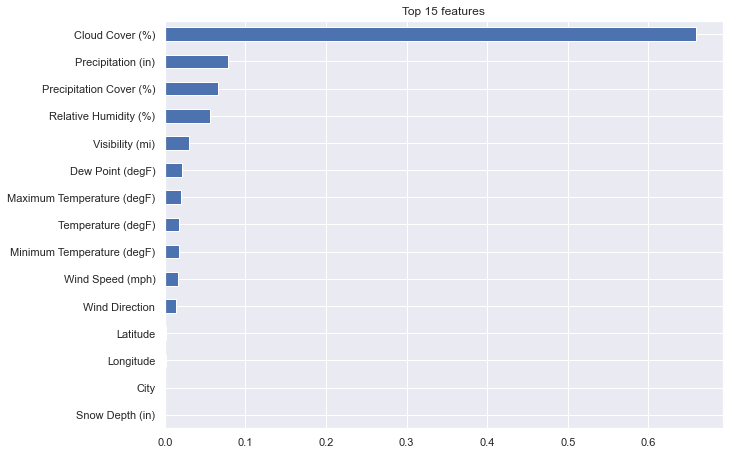

In [693]:
n=15
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [694]:
test_pred = clf.predict(X_test)
test_pred

array([0., 0., 0., 2., 0., 0., 2., 0., 5., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 5., 0., 0., 5., 0., 2., 0., 0., 0., 0., 0., 0., 2.,
       2., 5., 0., 0., 2., 0., 2., 4., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 5., 2., 0., 2., 0., 0., 0., 0., 2., 2., 0., 0., 0.,
       2., 2., 2., 2., 2., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 2., 2., 0., 2., 2., 0., 0., 0., 0., 0., 2.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 0.,
       5., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 2., 2.

In [695]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# summarize the fit of the model
print(metrics.classification_report(y_test, test_predict))
print(metrics.confusion_matrix(y_test, test_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       238
         2.0       0.98      1.00      0.99        58
         3.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         1
         5.0       1.00      0.89      0.94         9

    accuracy                           0.99       307
   macro avg       0.80      0.78      0.79       307
weighted avg       0.99      0.99      0.99       307

[[238   0   0   0   0]
 [  0  58   0   0   0]
 [  1   0   0   0   0]
 [  0   0   0   1   0]
 [  0   1   0   0   8]]


c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av